# Analyzing Home Advantage in MLS

## Data Wrangling 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set()

df = pd.read_csv('matches.csv')

list_of_columns = [
 'home',
 'away',
 'date',
 'venue',
 'league',
 'part_of_competition',
 'home_score',
 'away_score',
 'home_possessionPct',
 'away_possessionPct',
 'home_shotsSummary',
 'away_shotsSummary',
 'home_foulsCommitted',
 'away_foulsCommitted',
 'home_yellowCards',
 'away_yellowCards',
 'home_redCards',
 'away_redCards',
 'home_offsides',
 'away_offsides',
 'home_wonCorners',
 'away_wonCorners',
 'home_saves',
 'away_saves'
]

df = df.loc[:, list_of_columns]

df = df.dropna()

# unpacking shot summaries 
def shots(shot_summary):
    interm_string = shot_summary.strip(')')
    entries = interm_string.split('(')
    return int(entries[0])

def shots_on_goal(shot_summary):
    interm_string = shot_summary.strip(')')
    entries = interm_string.split('(')
    return int(entries[1])

df['home_shots'] = df['home_shotsSummary'].apply(shots)
df['home_shots_on_goal'] = df['home_shotsSummary'].apply(shots_on_goal)
df = df.drop('home_shotsSummary', axis=1)

df['away_shots'] = df['away_shotsSummary'].apply(shots)
df['away_shots_on_goal'] = df['away_shotsSummary'].apply(shots_on_goal)
df = df.drop('away_shotsSummary', axis=1)



# Creating result column
def decide_victory(home, away):
    if home > away:
        return 'h'
    elif home < away:
        return 'a'
    else:
        return 'd'

f_decide_victory = np.vectorize(decide_victory)

df['result'] = f_decide_victory(df['home_score'], df['away_score'])



# Formatting the percentages columns 
def strip_perc_symbol(perc):
    return float(perc.strip('%'))

df['home_possessionPct'] = df['home_possessionPct'].apply(strip_perc_symbol)
df['away_possessionPct'] = df['away_possessionPct'].apply(strip_perc_symbol)

df.head()



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,14,50,102,123,125,129,131,133,135,137,139,141,143,145,147,149,157,158,160,161,163,165,167,169,171,173,184,186,187,205,206) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,home,away,date,venue,league,part_of_competition,home_score,away_score,home_possessionPct,away_possessionPct,...,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves,home_shots,home_shots_on_goal,away_shots,away_shots_on_goal,result
2236,Columbus Crew SC,Toronto FC,"Saturday, March 29","MAPFRE Stadium, Columbus",2008 USA Major League Soccer,Regular Season 2008,2,0,50.0,50.0,...,1.0,3.0,7.0,8.0,5.0,9,6,11,4,h
2237,Real Salt Lake,Chicago Fire FC,"Saturday, March 29","Rice-Eccles Stadium, Salt Lake City",2008 USA Major League Soccer,Regular Season 2008,1,1,51.0,49.0,...,1.0,3.0,3.0,2.0,6.0,14,7,6,1,d
2238,Sporting Kansas City,DC United,"Saturday, March 29",Community America Ballpark,2008 USA Major League Soccer,Regular Season 2008,2,0,50.0,50.0,...,2.0,2.0,6.0,3.0,1.0,7,3,4,3,h
2239,New England Revolution,Houston Dynamo,"Saturday, March 29",Gillette Stadium,2008 USA Major League Soccer,Regular Season 2008,3,0,48.0,52.0,...,1.0,4.0,5.0,5.0,8.0,12,8,15,3,h
2240,Colorado Rapids,LA Galaxy,"Saturday, March 29","Dick's Sporting Goods Park, Denver",2008 USA Major League Soccer,Regular Season 2008,4,0,52.0,48.0,...,4.0,5.0,3.0,9.0,3.0,11,4,5,5,h


## Some Comparisons 

<ipython-input-3-2b768e1e04c9>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Home Victory", 'Draw', 'Away Victory'])


Text(0.5, 1.0, 'Results')

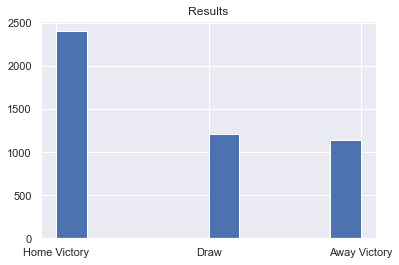

In [3]:
fig, ax = plt.subplots()
ax.hist(df['result'], align='mid')
ax.set_xticklabels(["Home Victory", 'Draw', 'Away Victory'])
ax.set_title('Results')

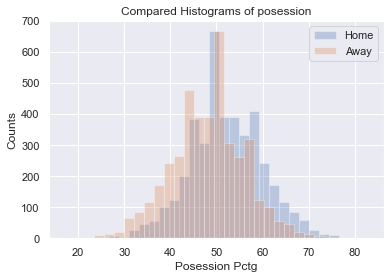

In [5]:
df_restr = df[(df['away_possessionPct'] != 0) & (df['home_possessionPct']!=0)]
plt.hist(df_restr['home_possessionPct'], label="Home", bins = 30, alpha=0.3)
plt.hist(df_restr['away_possessionPct'], label='Away', bins=30, alpha=0.3)
plt.title("Compared Histograms of posession")
plt.xlabel("Posession Pctg")
plt.ylabel("Counts")
plt.legend()

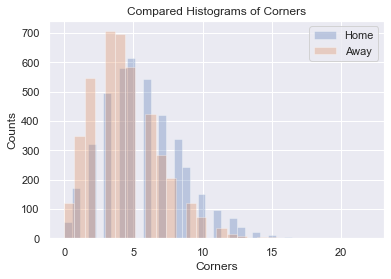

In [6]:
plt.hist(df_restr['home_wonCorners'], label="Home", bins = 30, alpha=0.3)
plt.hist(df_restr['away_wonCorners'], label='Away', bins=30, alpha=0.3)
plt.title("Compared Histograms of Corners")
plt.xlabel("Corners")
plt.ylabel("Counts")
plt.legend()

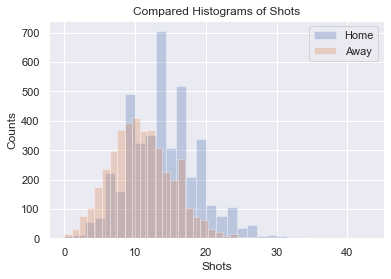

In [7]:
plt.hist(df_restr['home_shots'], label="Home", bins = 30, alpha=0.3)
plt.hist(df_restr['away_shots'], label='Away', bins=30, alpha=0.3)
plt.title("Compared Histograms of Shots")
plt.xlabel("Shots")
plt.ylabel("Counts")
plt.legend()